# Credit card-Machine Learning
## Dhachainee Murugayah 
***

## Table of the content 
### [Question 1](#a)
- [Importing the dataset](#b)
- [Data Description](#c)
- [Missing Values](#d)
- [Imputation for the missing values](#e)
- [Outliers](#f)
- [Imputation for the outliers](#g)
- [Discretizing Numeric Features](#h)
- [The Target Feature](#i)
- [Scaling Descriptive Features](#j)

### [Question 2](#aa)
- [2a](#bb)
- [2b](#cc)
- [2c](#dd)
- [2d](#ee)
- [2e](#ff)

# Question 1 <a></a>

## Importing the dataset <a></a>
The dataset is directly read and imported from the file stored in a folder called data. The name of the attributes explicitly specified  while loading in the dataset since the dataset does not contain the feature names. 

In [60]:
import numpy as np
import pandas as pd

#declaring the name of the columns
attributeNames = [
    'A1',
    'A2',
    'A3',
    'A4',
    'A5',
    'A6',
    'A7',
    'A8',
    'A9',
    'A10',
    'A11',
    'A12',
    'A13',
    'A14',
    'A15',
    'A16',
]

#importing/reading the data 
df = pd.read_csv('Assignment1_Q1_crx.data', sep = ',', names = attributeNames, header = None)

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Data Description <a></a>
The shape of the dataset is checked to make sure the data has been downloaded correctly.Also, the features type is checked in order to have a better understanding about the sturucture and format about the dataset.  

In [61]:
#checking the shape of the dataset
df.shape

(690, 16)

In [62]:
#checking the type of the attributes
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

The outputs show the dataset has 690 rows and 16 columns. In the 16 columns, A3,A8,A11 and A15 are numeric as the data types are float and integer and the rest of the columns are nominal. 

## Missing Values <a></a>

Calculating number of the missing values in each columns

In [63]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

Suprising the result shows the is no missing values. However, according to the *crx.names* there are 67 missing values in particular attributes A1,A2,A4,A5,A6,A7,A14. In order to explore further about the missing values, let's have a look at the percentage of missing value in column *A2*

In [64]:
df['A1'].value_counts(normalize=True).mul(100).round(2)


b    67.83
a    30.43
?     1.74
Name: A1, dtype: float64

It is cleary seen that column A1 has special character  **"?"**. Hence, let's check how many  **?** other columns have.

In [65]:
print((df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']] == '?').sum())


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


The counts are tally with *Missing Attribute Values* in *crx.names*. Hence, sign **?** is the only missing value for the dataset. In order to perform imputation, sign **?** will be replaced by **NaN**. Thus, the missing values can be easily idntified by the system. Moreover, the mode of *A2* is sign **?** which is not acceptable. Therefore, sign **?** must be replaced by **NaN** before performing the imputation. 

In [66]:
df.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,?,1.5,u,g,c,v,0.0,t,f,0,f,g,00000,0,-


In [67]:
# mark ? values as missing value (NaN)
df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']]= df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']].replace('?', np.NaN)
# count the number of NaN values in each column
print(df.isnull().sum())


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [68]:
#checking the mode of data frame
df.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,22.67,1.5,u,g,c,v,0.0,t,f,0,f,g,00000,0,-


## Imputation for the missing values <a></a>

Since the columns that carry missing values (*A1,A2,A4,A5,A6,A7,A14*) are  categorical features, the missing values are imputed with mode 

In [69]:
#replacing the missing value with mode 
for column in ['A1','A2','A4','A5','A6','A7','A14']:
  df[column].fillna(df[column].mode()[0], inplace=True)


In [70]:
#checking if there is any missing value after imputation
print(df.isnull().sum())

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


In [71]:
df['A1'].value_counts(normalize=True).mul(100).round(2)


b    69.57
a    30.43
Name: A1, dtype: float64

Earlier the *sign* of the missing value in column A1 as a special character **?**. Now it is replaced by *the mode of the column*. Same method implemented for the other columns with the missing values.

In [72]:
# converting type of column to 'float'
df['A14'] = df['A14'].astype('float')

*A14* contains numeric values. However, it is categorised as nominal. Therefore, *A14* is converted into *float*

## Outliers <a></a>

Summary statistics of the dataset has been generated in order to explore the numerical features in the dataset

In [73]:
df.describe(include = np.number).round(2)  # numerical features


,A3,A8,A11,A14,A15
count,690.00,690.00,690.00,690.00,690.00
mean,4.76,2.22,2.40,180.55,1017.39
std,4.98,3.35,4.86,173.97,5210.10
min,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.16,0.00,60.00,0.00
50%,2.75,1.00,0.00,160.00,5.00
75%,7.21,2.62,3.00,272.00,395.50
max,28.00,28.50,67.00,2000.00,100000.00


The statistics table above shows that A3,A8,A11 and A15 are the numeric features of the dataset. There is much difference between the minimum, mean and maximum value of the feature. For example, the minumum value of A15 is 0 and the mean 1017.39. However, the maximum value of A15 is 100000 which shows there are possible outliers. There outliers are checked for A3,A8,A11 and A15 using boxplots. 

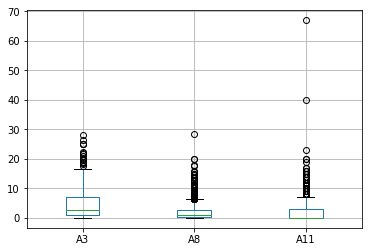

In [74]:
boxplot = df.boxplot(column=['A3','A8','A11']) 


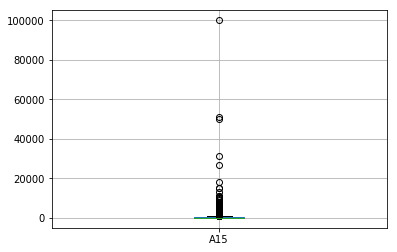

In [75]:
boxplot = df.boxplot(column=['A15'])

## Imputation for the outliers <a></a>

The outliers in the A3,A8,A11 and A15 are replaced by the median of features respectively
 - the first line of the code will print the value of 50th percentile also know as the median value which will be used to replace
 - the second line of the code will print 95th percentile which is the maximum value of the column
 - the third line of the code will replace the value greater than 95th percentile with the median value. 

In [76]:
# Replacing Outliers with Median Values for A3
print('Median:',df['A3'].quantile(0.50)) 
print('95th percentile:',df['A3'].quantile(0.95)) 
df['A3'] = np.where(df['A3'] > 14.0, 2.75, df['A3'])
df.describe()

Median: 2.75
95th percentile: 14.0


,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,3.985594,2.223406,2.40000,180.547826,1017.385507
std,3.793700,3.346513,4.86294,173.970323,5210.102598
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,60.000000,0.000000
50%,2.750000,1.000000,0.00000,160.000000,5.000000
75%,6.000000,2.625000,3.00000,272.000000,395.500000
max,14.000000,28.500000,67.00000,2000.000000,100000.000000


In [77]:
# Replacing Outliers with Median Values for A8

print('Median:',df['A8'].quantile(0.50)) 
print('95th percentile:',df['A8'].quantile(0.95)) 

df['A8'] = np.where(df['A8'] > 8.568749999999994, 1.0, df['A8'])
df.describe()

Median: 1.0
95th percentile: 8.568749999999994


,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,3.985594,1.590558,2.40000,180.547826,1017.385507
std,3.793700,1.913748,4.86294,173.970323,5210.102598
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,60.000000,0.000000
50%,2.750000,1.000000,0.00000,160.000000,5.000000
75%,6.000000,2.250000,3.00000,272.000000,395.500000
max,14.000000,8.500000,67.00000,2000.000000,100000.000000


In [78]:
# Replacing Outliers with Median Values for A11

print('Median:',df['A11'].quantile(0.50)) 
print('95th percentile:',df['A11'].quantile(0.95)) 
df['A11'] = np.where(df['A11'] > 11.0, 0.0, df['A11'])
df.describe()

Median: 0.0
95th percentile: 11.0


,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,3.985594,1.590558,1.600000,180.547826,1017.385507
std,3.793700,1.913748,2.847758,173.970323,5210.102598
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,60.000000,0.000000
50%,2.750000,1.000000,0.000000,160.000000,5.000000
75%,6.000000,2.250000,2.000000,272.000000,395.500000
max,14.000000,8.500000,11.000000,2000.000000,100000.000000


In [79]:
# Replacing Outliers with Median Values for A15

print('Median:',df['A15'].quantile(0.50)) 
print('95th percentile:',df['A15'].quantile(0.95)) 
df['A15'] = np.where(df['A15'] > 4119.399999999996, 5.0, df['A15'])
df.describe()

Median: 5.0
95th percentile: 4119.399999999996


,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,3.985594,1.590558,1.600000,180.547826,302.092754
std,3.793700,1.913748,2.847758,173.970323,675.870768
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,60.000000,0.000000
50%,2.750000,1.000000,0.000000,160.000000,5.000000
75%,6.000000,2.250000,2.000000,272.000000,236.250000
max,14.000000,8.500000,11.000000,2000.000000,4071.000000


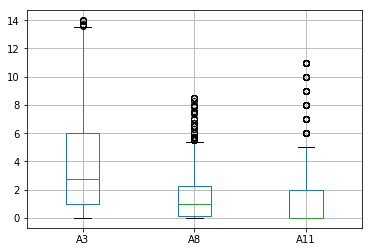

In [80]:
boxplot = df.boxplot(column=['A3','A8','A11']) 


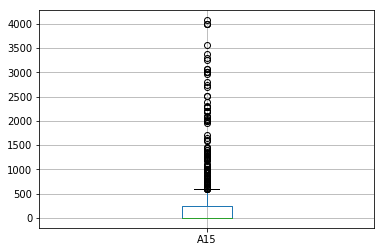

In [81]:
boxplot = df.boxplot(column=['A15'])

The boxplots above shows that most of the outliers have been removed by replacing the median value to the numeric features.

## Discretizing Numeric Features <a></a>

In order to perform equal-frequency binning with 3 bins, *A2* is converted into float.

In [82]:
# converting type of column to 'float'
df['A2'] = df['A2'].astype('float')

Discretize *A2* into three bins and assign them specific labels called *low*, *medium*, and *high*

In [83]:
#copy the data
df = df.copy()

df['A2'] = pd.qcut(df['A2'], q=3, 
                   labels=['low', 'medium', 'high'])

In [84]:
#checking the type of values in A2
df['A2'].value_counts()

low       233
high      229
medium    228
Name: A2, dtype: int64

In [85]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,medium,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,high,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,medium,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,medium,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,low,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


Integer encoding is performed for *A2* and the order has been spefified as *low* is 0, *medium* is 1 and *high* is 2

In [86]:
df['A2'] = df['A2'].map( {'low':0, 'medium':1, 'high':2})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,1,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,2,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,1,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,1,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,0,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


## The Target Feature <a></a>

A16 is the target feature in this dataset. New dataframe is created without the column A16. The distribution of the values of the target feature listed below. 

In [87]:
#assign A16 as target 
target = df['A16']

#creating new dataframe and dropping A16 column
Data = df.drop(columns='A16')

#counting the values in target feature
target.value_counts()

-    383
+    307
Name: A16, dtype: int64

The target feature is encoded as 0 and 1 using LabelEncoder from the sklearn preprocessing module.Also, Pandas and Numpy preprocessing modules are used for the encoding. 

In [88]:
import numpy as np

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_fit = le.fit(target)
target_encoded_le = le_fit.transform(target)

print("Target Type:", type(target))

print("Counts Using NumPy:")
print(np.unique(target_encoded_le, return_counts = True))

# but this works:
print("Counts Using Pandas:")
print(pd.Series(target_encoded_le).value_counts())

Target Type: <class 'pandas.core.series.Series'>
Counts Using NumPy:
(array([0, 1]), array([307, 383]))
Counts Using Pandas:
1    383
0    307
dtype: int64


"positive" class must be encoded as "1" regardless of the alphabetical order of the target feature levels. However, in  Pandas, Numpy and sklearn preprocessing module "negative" is encoded as 1. Therefore, the encoding is done manually using replace method. 

In [89]:
target = target.replace({'-': 0, '+': 1})

target.value_counts()

0    383
1    307
Name: A16, dtype: int64

## Scaling Descriptive Features <a></a>

In [90]:
# to list down the categorical features
categorical_cols = Data.columns[Data.dtypes == np.object].tolist()
categorical_cols

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

All the categorical features are appeared to be nominal.A new data frame called Data_encoded is created and the encoded data using one-hot encoding has been stored in this data frame.The data will be encoded with only one binary variable if the features has only two levels. 

In [91]:
# retain original Data without encoding for further analysis
Data_encoded = Data.copy()  

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    q = len(Data_encoded[col].unique())
    if (q == 2):
        Data_encoded[col] = pd.get_dummies(Data_encoded[col], drop_first=True)


#numeric feature will be untouched
Data_encoded = pd.get_dummies(Data_encoded)

In [92]:
#to show the shape of the data after encoding
print(f'Shape of Data_encoded is {Data_encoded.shape}\n')  

Data_encoded.sample(n=4, random_state=11)

Shape of Data_encoded is (690, 42)



,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
214,1,1,2.710,5.25,1,1,1.0,0,211.0,0.0,...,0,0,0,0,0,1,0,1,0,0
545,1,2,11.000,1.50,1,0,0.0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
436,1,0,0.585,0.00,0,1,3.0,0,350.0,769.0,...,1,0,0,0,0,0,0,1,0,0
201,0,2,1.000,2.25,1,0,0.0,1,0.0,300.0,...,0,0,0,0,0,0,0,1,0,0


The table below shows the description of Data_encoded 

In [93]:
Data_encoded.describe(include='all').round(3)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,...,690.000,690.0,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,0.696,0.994,3.986,1.591,0.523,0.428,1.600,0.458,180.548,302.093,...,0.083,0.2,0.012,0.006,0.003,0.591,0.012,0.906,0.012,0.083
std,0.460,0.819,3.794,1.914,0.500,0.495,2.848,0.499,173.970,675.871,...,0.275,0.4,0.107,0.076,0.054,0.492,0.107,0.292,0.107,0.275
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,1.000,0.165,0.000,0.000,0.000,0.000,60.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
50%,1.000,1.000,2.750,1.000,1.000,0.000,0.000,0.000,160.000,5.000,...,0.000,0.0,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
75%,1.000,2.000,6.000,2.250,1.000,1.000,2.000,1.000,272.000,236.250,...,0.000,0.0,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
max,1.000,2.000,14.000,8.500,1.000,1.000,11.000,1.000,2000.000,4071.000,...,1.000,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Normalization is performed using standard scaling method within preprocessing submodule of Scikit-Learn. It is called as Data_encoded_norm_numpy.

In [94]:
from sklearn import preprocessing

Data_scaler = preprocessing.StandardScaler()

Data_encoded_norm_numpy = Data_scaler.fit_transform(Data_encoded)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
# to get the shape of Data_encoded_norm_df 
Data_encoded_norm_df = pd.DataFrame(Data_encoded_norm_numpy, 
                                    columns=Data_encoded.columns)

Data_encoded_norm_df.sample(n=4, random_state=11)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
214,0.661438,0.007085,-0.336484,1.913573,0.954650,1.157144,-0.210845,-0.919195,0.175169,-0.447292,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079
545,0.661438,1.229206,1.850303,-0.047354,0.954650,-0.864196,-0.562253,-0.919195,-1.038561,-0.447292,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,-3.100868,-0.108306,3.332456
436,0.661438,-1.215037,-0.897030,-0.831725,-1.047504,1.157144,0.491971,-0.919195,0.974736,0.691324,...,3.332456,-0.5,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079
201,-1.511858,1.229206,-0.787558,0.344831,0.954650,-0.864196,-0.562253,1.087908,-1.038561,-0.003099,...,-0.300079,-0.5,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079


In [96]:
#to get the description of Data_encoded_norm_df 
print(f'Shape of Data_encoded_norm_df is {Data_encoded_norm_df.shape}\n') 

Data_encoded_norm_df.describe(include='all').round(3)

Shape of Data_encoded_norm_df is (690, 42)



,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,...,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.512,-1.215,-1.051,-0.832,-1.048,-0.864,-0.562,-0.919,-1.039,-0.447,...,-0.300,-0.500,-0.108,-0.076,-0.054,-1.203,-0.108,-3.101,-0.108,-0.300
25%,-1.512,-1.215,-0.788,-0.745,-1.048,-0.864,-0.562,-0.919,-0.693,-0.447,...,-0.300,-0.500,-0.108,-0.076,-0.054,-1.203,-0.108,0.322,-0.108,-0.300
50%,0.661,0.007,-0.326,-0.309,0.955,-0.864,-0.562,-0.919,-0.118,-0.440,...,-0.300,-0.500,-0.108,-0.076,-0.054,0.831,-0.108,0.322,-0.108,-0.300
75%,0.661,1.229,0.531,0.345,0.955,1.157,0.141,1.088,0.526,-0.097,...,-0.300,-0.500,-0.108,-0.076,-0.054,0.831,-0.108,0.322,-0.108,-0.300
max,0.661,1.229,2.642,3.613,0.955,1.157,3.303,1.088,10.466,5.580,...,3.332,2.000,9.233,13.096,18.547,0.831,9.233,0.322,9.233,3.332


A new data frame *df_clean* is created with the combination of normalized, standard scaling and target feature. 

In [97]:
df_clean = Data_encoded_norm_df.assign(target = target.values)

df_clean.sample(n=4, random_state=11)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s,target
214,0.661438,0.007085,-0.336484,1.913573,0.954650,1.157144,-0.210845,-0.919195,0.175169,-0.447292,...,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079,1
545,0.661438,1.229206,1.850303,-0.047354,0.954650,-0.864196,-0.562253,-0.919195,-1.038561,-0.447292,...,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,-3.100868,-0.108306,3.332456,0
436,0.661438,-1.215037,-0.897030,-0.831725,-1.047504,1.157144,0.491971,-0.919195,0.974736,0.691324,...,-0.5,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079,0
201,-1.511858,1.229206,-0.787558,0.344831,0.954650,-0.864196,-0.562253,1.087908,-1.038561,-0.003099,...,-0.5,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079,1


In [98]:
#to get the shape of the data frame
df_clean.shape

(690, 43)

In [99]:
#to get the description of the data frame
df_clean.describe(include='all').round(3) 
df_clean.head(5)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s,target
0,0.661438,0.007085,-1.051344,-0.178083,0.95465,1.157144,-0.210845,-0.919195,0.123399,-0.447292,...,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079,1
1,-1.511858,1.229206,0.125142,0.757933,0.95465,1.157144,1.546196,-0.919195,-0.791213,0.381869,...,2.0,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079,1
2,-1.511858,0.007085,-0.919451,-0.047354,0.95465,-0.864196,-0.562253,-0.919195,0.572076,0.772760,...,2.0,-0.108306,-0.07636,-0.053916,-1.202834,-0.108306,0.322490,-0.108306,-0.300079,1
3,0.661438,0.007085,-0.645114,1.129202,0.95465,1.157144,1.194788,1.087908,-0.463333,-0.442851,...,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,0.322490,-0.108306,-0.300079,1
4,0.661438,-1.215037,0.432453,0.062458,0.95465,-0.864196,-0.562253,-0.919195,-0.348288,-0.447292,...,-0.5,-0.108306,-0.07636,-0.053916,0.831370,-0.108306,-3.100868,-0.108306,3.332456,1


The clean dataset *df_clean* is written to a CSV file called *df_clean.csv*

In [100]:
df_clean.to_csv('df_clean.csv', index=False)

# Question 2  <a></a>

The dataset is directly read and imported from the file stored in a folder called data. Another copy of the original data is created for future use. 

In [101]:
import numpy as np
import pandas as pd

#importing the data frame
df2= pd.read_csv('Assignment1_Q2.csv', sep =',')

#creating copy of data frame d2
df3=df2.copy()

df2.head()

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961


The features type is checked in order to have a better understanding about the sturucture and format about the dataset.

In [102]:
df2.dtypes

COUNTRY_ID       object
LIFE_EXP        float64
TOP10_INCOME    float64
INFANT_MORT     float64
MIL_SPEND       float64
SCHOOL_YEARS    float64
CPI              object
dtype: object

## 2a) <a></a>
Russia is taken as a constant and its values are used to perform calculation to find the Manhattan distance. The values of Russia is subtracted with the values of other countries based on the type of the column and then summmed up . 

In [103]:
#creating the variable to store value of Russia
R_a=df2.iloc[16,1]
R_b=df2.iloc[16,2]
R_c=df2.iloc[16,3]
R_d=df2.iloc[16,4]
R_e=df2.iloc[16,5]

#calculating the Manhattan distance for each countries
Afghanistan=abs(R_a-df2.iloc[0,1])+abs(R_b-df2.iloc[0,2])+abs(R_c-df2.iloc[0,3])+abs(R_d-df2.iloc[0,4])+abs(R_e-df2.iloc[0,5])
Haiti=abs(R_a-df2.iloc[1,1])+abs(R_b-df2.iloc[1,2])+abs(R_c-df2.iloc[1,3])+abs(R_d-df2.iloc[1,4])+abs(R_e-df2.iloc[1,5])
Nigeria=abs(R_a-df2.iloc[2,1])+abs(R_b-df2.iloc[2,2])+abs(R_c-df2.iloc[2,3])+abs(R_d-df2.iloc[2,4])+abs(R_e-df2.iloc[2,5])
Egypt=abs(R_a-df2.iloc[3,1])+abs(R_b-df2.iloc[3,2])+abs(R_c-df2.iloc[3,3])+abs(R_d-df2.iloc[3,4])+abs(R_e-df2.iloc[3,5])
Argentina=abs(R_a-df2.iloc[4,1])+abs(R_b-df2.iloc[4,2])+abs(R_c-df2.iloc[4,3])+abs(R_d-df2.iloc[4,4])+abs(R_e-df2.iloc[4,5])
China=abs(R_a-df2.iloc[5,1])+abs(R_b-df2.iloc[5,2])+abs(R_c-df2.iloc[5,3])+abs(R_d-df2.iloc[5,4])+abs(R_e-df2.iloc[5,5])
Brazil=abs(R_a-df2.iloc[6,1])+abs(R_b-df2.iloc[6,2])+abs(R_c-df2.iloc[6,3])+abs(R_d-df2.iloc[6,4])+abs(R_e-df2.iloc[6,5])
Israel=abs(R_a-df2.iloc[7,1])+abs(R_b-df2.iloc[7,2])+abs(R_c-df2.iloc[7,3])+abs(R_d-df2.iloc[7,4])+abs(R_e-df2.iloc[7,5])
USA=abs(R_a-df2.iloc[8,1])+abs(R_b-df2.iloc[8,2])+abs(R_c-df2.iloc[8,3])+abs(R_d-df2.iloc[8,4])+abs(R_e-df2.iloc[8,5])
Ireland=abs(R_a-df2.iloc[9,1])+abs(R_b-df2.iloc[9,2])+abs(R_c-df2.iloc[9,3])+abs(R_d-df2.iloc[9,4])+abs(R_e-df2.iloc[9,5])
UK=abs(R_a-df2.iloc[10,1])+abs(R_b-df2.iloc[10,2])+abs(R_c-df2.iloc[10,3])+abs(R_d-df2.iloc[10,4])+abs(R_e-df2.iloc[10,5])
Germany=abs(R_a-df2.iloc[11,1])+abs(R_b-df2.iloc[11,2])+abs(R_c-df2.iloc[11,3])+abs(R_d-df2.iloc[11,4])+abs(R_e-df2.iloc[11,5])
Canada=abs(R_a-df2.iloc[12,1])+abs(R_b-df2.iloc[12,2])+abs(R_c-df2.iloc[12,3])+abs(R_d-df2.iloc[12,4])+abs(R_e-df2.iloc[12,5])
Australia=abs(R_a-df2.iloc[13,1])+abs(R_b-df2.iloc[13,2])+abs(R_c-df2.iloc[13,3])+abs(R_d-df2.iloc[13,4])+abs(R_e-df2.iloc[13,5])
Sweden=abs(R_a-df2.iloc[14,1])+abs(R_b-df2.iloc[14,2])+abs(R_c-df2.iloc[14,3])+abs(R_d-df2.iloc[14,4])+abs(R_e-df2.iloc[14,5])
New_Zealand=abs(R_a-df2.iloc[15,1])+abs(R_b-df2.iloc[15,2])+abs(R_c-df2.iloc[15,3])+abs(R_d-df2.iloc[15,4])+abs(R_e-df2.iloc[15,5])

#creating a new column and assigning value to it
df2['Manhattan distance'] = [Afghanistan,Haiti,Nigeria,Egypt,Argentina,China,Brazil,Israel,USA,Ireland,UK,Germany,Canada,Australia,Sweden,New_Zealand,None]


#sorting out the Manhattan distance column in ascending order
df2.sort_values(by=['Manhattan distance'])




,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961,17.98
8,U.S.A,78.51,29.85,6.3,4.72,13.7,7.1357,18.07
5,China,74.87,29.98,13.7,1.95,6.4,3.6356,21.07
10,U.K.,80.09,28.49,4.4,2.59,13.0,7.7751,22.64
15,New Zealand,80.67,27.81,4.9,1.13,12.3,9.4627,25.36
7,Israel,81.30,28.80,3.6,6.77,12.5,5.8069,26.26
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622,27.17
9,Ireland,80.15,27.23,3.5,0.60,11.5,7.536,28.15
12,Canada,80.99,24.79,4.9,1.42,14.2,8.6725,29.11
6,Brazil,73.12,42.93,14.5,1.43,7.2,3.7741,29.39


The output clearly shows that the nearest three neighbors to Russia are Argentina,U.S.A and China . Therefore, the average of the CPI score of these three countries will be the CPI value of Russia. 

Since, the CPI feature has **?** sign, it has been replaced by missing value.

In [104]:
# mark ? values as missing value (NaN)
df2['CPI']= df2['CPI'].replace('?', np.NaN)
df2

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171,93.85
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999,114.99
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493,107.07
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622,27.17
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961,17.98
5,China,74.87,29.98,13.7,1.95,6.4,3.6356,21.07
6,Brazil,73.12,42.93,14.5,1.43,7.2,3.7741,29.39
7,Israel,81.30,28.80,3.6,6.77,12.5,5.8069,26.26
8,U.S.A,78.51,29.85,6.3,4.72,13.7,7.1357,18.07
9,Ireland,80.15,27.23,3.5,0.60,11.5,7.536,28.15


The CPI feature is categorical. Therefore, it is converted into float type in order to perform calculation for the next question. 

In [105]:
df2['CPI'] = df2['CPI'].astype(float)

In [106]:
CPI_Russia=((df2.at[4,'CPI']+df2.at[8,'CPI']+df2.at[5,'CPI'])/3)
CPI_Russia=round(CPI_Russia,4)
print(" CPI of Russia:",CPI_Russia)

 CPI of Russia: 4.5891


## 2b) <a></a>

In [107]:
#calculating the weight
df2['Weight']=1/(df2['Manhattan distance']**2)
#multiplying weight and CPI
df2['Weight x CPI']=(df2['Weight'])*(df2['CPI'])
df2

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance,Weight,Weight x CPI
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171,93.85,0.000114,0.000172
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999,114.99,0.000076,0.000136
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493,107.07,0.000087,0.000214
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622,27.17,0.001355,0.003877
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961,17.98,0.003093,0.009268
5,China,74.87,29.98,13.7,1.95,6.4,3.6356,21.07,0.002253,0.008189
6,Brazil,73.12,42.93,14.5,1.43,7.2,3.7741,29.39,0.001158,0.004369
7,Israel,81.30,28.80,3.6,6.77,12.5,5.8069,26.26,0.001450,0.008421
8,U.S.A,78.51,29.85,6.3,4.72,13.7,7.1357,18.07,0.003063,0.021853
9,Ireland,80.15,27.23,3.5,0.60,11.5,7.5360,28.15,0.001262,0.009510


In [108]:
#Sum up the total weight
sumWeight = df2['Weight'].sum()  

#sum up the total of weight multiply CPI
sumWeightCPI=df2['Weight x CPI'].sum() 

#calculating the value return
valueReturn=sumWeightCPI/sumWeight

#round of the value return into 4 decimal places
valueReturn=round(valueReturn,4)

print('Value return:',valueReturn )

Value return: 6.1215


## 2c) <a></a>

In [109]:
df3.head()

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961


Performing the normalization using Min-Max Scaling. 

In [110]:
df3["LIFE_EXP"]=((df3["LIFE_EXP"]-df3["LIFE_EXP"].min())/(df3["LIFE_EXP"].max()-df3["LIFE_EXP"].min()))
df3["TOP10_INCOME"]=((df3["TOP10_INCOME"]-df3["TOP10_INCOME"].min())/(df3["TOP10_INCOME"].max()-df3["TOP10_INCOME"].min()))
df3["INFANT_MORT"]=((df3["INFANT_MORT"]-df3["INFANT_MORT"].min())/(df3["INFANT_MORT"].max()-df3["INFANT_MORT"].min()))
df3["MIL_SPEND"]=((df3["MIL_SPEND"]-df3["MIL_SPEND"].min())/(df3["MIL_SPEND"].max()-df3["MIL_SPEND"].min()))
df3["SCHOOL_YEARS"]=((df3["SCHOOL_YEARS"]-df3["SCHOOL_YEARS"].min())/(df3["SCHOOL_YEARS"].max()-df3["SCHOOL_YEARS"].min()))
df3

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,0.393907,0.044531,0.896509,0.651198,0.000000,1.5171
1,Haiti,0.000000,1.000000,0.881546,0.000000,0.217391,1.7999
2,Nigeria,0.169857,0.631250,1.000000,0.146707,0.268116,2.4493
3,Egypt,0.686978,0.176172,0.214464,0.264970,0.355072,2.8622
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356
6,Brazil,0.758156,0.814844,0.150873,0.200599,0.492754,3.7741
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.536


The features type is checked in order to have a better understanding about the sturucture and format about the dataset.

In [111]:
df3.dtypes

COUNTRY_ID       object
LIFE_EXP        float64
TOP10_INCOME    float64
INFANT_MORT     float64
MIL_SPEND       float64
SCHOOL_YEARS    float64
CPI              object
dtype: object

Again Russia is taken as a constant and its values are used to perform calculation to find the Manhattan distance. The values of Russia is subtracted with the values of other countries based on the type of the column and then summmed up . 

In [112]:
#creating the variable to store value of Russia
R_a=df3.iloc[16,1]
R_b=df3.iloc[16,2]
R_c=df3.iloc[16,3]
R_d=df3.iloc[16,4]
R_e=df3.iloc[16,5]

#calculating the Manhattan distance for each countries
Afghanistan=abs(R_a-df3.iloc[0,1])+abs(R_b-df3.iloc[0,2])+abs(R_c-df3.iloc[0,3])+abs(R_d-df3.iloc[0,4])+abs(R_e-df3.iloc[0,5])
Haiti=abs(R_a-df3.iloc[1,1])+abs(R_b-df3.iloc[1,2])+abs(R_c-df3.iloc[1,3])+abs(R_d-df3.iloc[1,4])+abs(R_e-df3.iloc[1,5])
Nigeria=abs(R_a-df3.iloc[2,1])+abs(R_b-df3.iloc[2,2])+abs(R_c-df3.iloc[2,3])+abs(R_d-df3.iloc[2,4])+abs(R_e-df3.iloc[2,5])
Egypt=abs(R_a-df3.iloc[3,1])+abs(R_b-df3.iloc[3,2])+abs(R_c-df3.iloc[3,3])+abs(R_d-df3.iloc[3,4])+abs(R_e-df3.iloc[3,5])
Argentina=abs(R_a-df3.iloc[4,1])+abs(R_b-df3.iloc[4,2])+abs(R_c-df3.iloc[4,3])+abs(R_d-df3.iloc[4,4])+abs(R_e-df3.iloc[4,5])
China=abs(R_a-df3.iloc[5,1])+abs(R_b-df3.iloc[5,2])+abs(R_c-df3.iloc[5,3])+abs(R_d-df3.iloc[5,4])+abs(R_e-df3.iloc[5,5])
Brazil=abs(R_a-df3.iloc[6,1])+abs(R_b-df3.iloc[6,2])+abs(R_c-df3.iloc[6,3])+abs(R_d-df3.iloc[6,4])+abs(R_e-df3.iloc[6,5])
Israel=abs(R_a-df3.iloc[7,1])+abs(R_b-df3.iloc[7,2])+abs(R_c-df3.iloc[7,3])+abs(R_d-df3.iloc[7,4])+abs(R_e-df3.iloc[7,5])
USA=abs(R_a-df3.iloc[8,1])+abs(R_b-df3.iloc[8,2])+abs(R_c-df3.iloc[8,3])+abs(R_d-df3.iloc[8,4])+abs(R_e-df3.iloc[8,5])
Ireland=abs(R_a-df3.iloc[9,1])+abs(R_b-df3.iloc[9,2])+abs(R_c-df3.iloc[9,3])+abs(R_d-df3.iloc[9,4])+abs(R_e-df3.iloc[9,5])
UK=abs(R_a-df3.iloc[10,1])+abs(R_b-df3.iloc[10,2])+abs(R_c-df3.iloc[10,3])+abs(R_d-df3.iloc[10,4])+abs(R_e-df3.iloc[10,5])
Germany=abs(R_a-df3.iloc[11,1])+abs(R_b-df3.iloc[11,2])+abs(R_c-df3.iloc[11,3])+abs(R_d-df3.iloc[11,4])+abs(R_e-df3.iloc[11,5])
Canada=abs(R_a-df3.iloc[12,1])+abs(R_b-df3.iloc[12,2])+abs(R_c-df3.iloc[12,3])+abs(R_d-df3.iloc[12,4])+abs(R_e-df3.iloc[12,5])
Australia=abs(R_a-df3.iloc[13,1])+abs(R_b-df3.iloc[13,2])+abs(R_c-df3.iloc[13,3])+abs(R_d-df3.iloc[13,4])+abs(R_e-df3.iloc[13,5])
Sweden=abs(R_a-df3.iloc[14,1])+abs(R_b-df3.iloc[14,2])+abs(R_c-df3.iloc[14,3])+abs(R_d-df3.iloc[14,4])+abs(R_e-df3.iloc[14,5])
New_Zealand=abs(R_a-df3.iloc[15,1])+abs(R_b-df3.iloc[15,2])+abs(R_c-df3.iloc[15,3])+abs(R_d-df3.iloc[15,4])+abs(R_e-df3.iloc[15,5])

#creating a new column and assigning value to it
df3['Manhattan distance'] = [Afghanistan,Haiti,Nigeria,Egypt,Argentina,China,Brazil,Israel,USA,Ireland,UK,Germany,Canada,Australia,Sweden,New_Zealand,None]

#sorting out the Manhattan distance column in ascending order
df3.sort_values(by=['Manhattan distance'])

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357,0.596446
10,U.K.,0.946077,0.250781,0.024938,0.374251,0.913043,7.7751,0.729507
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961,0.953569
15,New Zealand,0.961715,0.224219,0.031172,0.155689,0.862319,9.4627,1.020268
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069,1.024250
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356,1.066451
13,Australia,1.000000,0.130078,0.022444,0.264970,0.804348,8.8442,1.110111
12,Canada,0.970342,0.106250,0.031172,0.199102,1.000000,8.6725,1.154176
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.536,1.183673
14,Sweden,0.982205,0.004297,0.000000,0.176647,0.898551,9.2985,1.234662


The output clearly shows that the nearest three neighbors to Russia after the normalization are U.S.A, U.K. and Argentina . Therefore, the average of the CPI score of these three countries will be the CPI value of Russia.

Since, the CPI feature has **?** sign, it has been replaced by missing value.

In [113]:
# mark ? values as missing value (NaN)
df3['CPI']= df3['CPI'].replace('?', np.NaN)
df3

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance
0,Afghanistan,0.393907,0.044531,0.896509,0.651198,0.000000,1.5171,2.339693
1,Haiti,0.000000,1.000000,0.881546,0.000000,0.217391,1.7999,3.275534
2,Nigeria,0.169857,0.631250,1.000000,0.146707,0.268116,2.4493,2.657950
3,Egypt,0.686978,0.176172,0.214464,0.264970,0.355072,2.8622,1.247652
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961,0.953569
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356,1.066451
6,Brazil,0.758156,0.814844,0.150873,0.200599,0.492754,3.7741,1.422164
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069,1.024250
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357,0.596446
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.536,1.183673


The CPI feature is categorical. Therefore, it is converted into float type in order to perform calculation for the next question. 

In [114]:
df3['CPI'] = df3['CPI'].astype(float)

In [115]:
#calculating the CPI of Russia
CPI_Russia=((df3.at[8,'CPI']+df3.at[10,'CPI']+df3.at[4,'CPI'])/3)

#round of the CPI into 4 decimal places
CPI_Russia=round(CPI_Russia,4)

print(" CPI of Russia:",CPI_Russia)

 CPI of Russia: 5.969


In [116]:
df3=df3.replace(df3.loc[16].at['CPI'],CPI_Russia )
df3

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance
0,Afghanistan,0.393907,0.044531,0.896509,0.651198,0.000000,1.5171,2.339693
1,Haiti,0.000000,1.000000,0.881546,0.000000,0.217391,1.7999,3.275534
2,Nigeria,0.169857,0.631250,1.000000,0.146707,0.268116,2.4493,2.657950
3,Egypt,0.686978,0.176172,0.214464,0.264970,0.355072,2.8622,1.247652
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961,0.953569
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356,1.066451
6,Brazil,0.758156,0.814844,0.150873,0.200599,0.492754,3.7741,1.422164
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069,1.024250
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357,0.596446
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.5360,1.183673


## 2d) <a></a>

In [117]:
#calculating the weight
df3['Weight']=1/(df3['Manhattan distance']**2)

#multiplying weight and CPI and store it in a column 
df3['Weight x CPI']=(df3['Weight'])*(df3['CPI'])
df3

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI,Manhattan distance,Weight,Weight x CPI
0,Afghanistan,0.393907,0.044531,0.896509,0.651198,0.000000,1.5171,2.339693,0.182676,0.277138
1,Haiti,0.000000,1.000000,0.881546,0.000000,0.217391,1.7999,3.275534,0.093204,0.167758
2,Nigeria,0.169857,0.631250,1.000000,0.146707,0.268116,2.4493,2.657950,0.141549,0.346696
3,Egypt,0.686978,0.176172,0.214464,0.264970,0.355072,2.8622,1.247652,0.642411,1.838709
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961,0.953569,1.099754,3.294974
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356,1.066451,0.879262,3.196644
6,Brazil,0.758156,0.814844,0.150873,0.200599,0.492754,3.7741,1.422164,0.494425,1.866011
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069,1.024250,0.953208,5.535185
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357,0.596446,2.810983,20.058329
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.5360,1.183673,0.713735,5.378704


In [118]:
#Sum up the total weight
sumWeight = df3['Weight'].sum() 

#sum up the total of weight multiply CPI
sumWeightCPI=df3['Weight x CPI'].sum() 

#calculating the value return
valueReturn=sumWeightCPI/sumWeight

#round of the value return into 4 decimal places
valueReturn=round(valueReturn,4)
print('Value return:',valueReturn )

Value return: 6.6077


## 2e) <a></a>
The normalized dataset with the weighted k-NN model is the most appropriate dataset to make accurate prediction. The example above shows the importance of using normalized data and the importance of selecting appropriate method to calculate the distance as the data ranges in the dataset is totally different compare to the unnormalized data which has been used earlier and also the actual CPI of Russia. It is because Manhattan distance which is also known as taxi-cab distance covers on point from another point on a road system. Therefore, Manhattan distance is not appropriate for low dimensional dataset. Apart from that, the size of the dataset is small. Hence, using the three nearest neighbors probably tends to underﬁt for this. 

***